In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
X= digits.data

In [7]:
X.shape

(1797, 64)

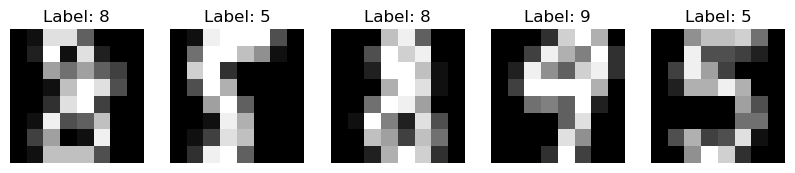

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select random indices
random_indices = np.random.choice(len(digits.images), size=5, replace=False)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, idx in zip(axes, random_indices):
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title(f"Label: {digits.target[idx]}")
    ax.axis("off")

plt.show()


In [9]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [53]:
import numpy as np

# Adding Gaussian noise to the data
noisy_digits = X + np.random.normal(0, 2, size=X.shape)

Now noisy_digits is the corrupted version of the data

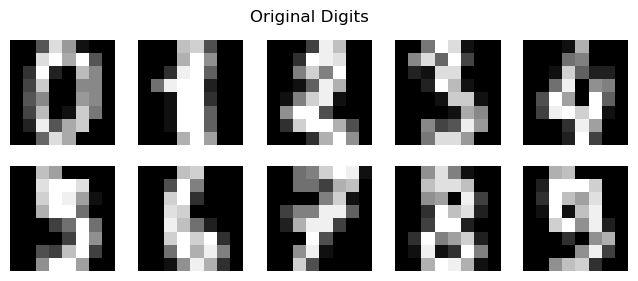

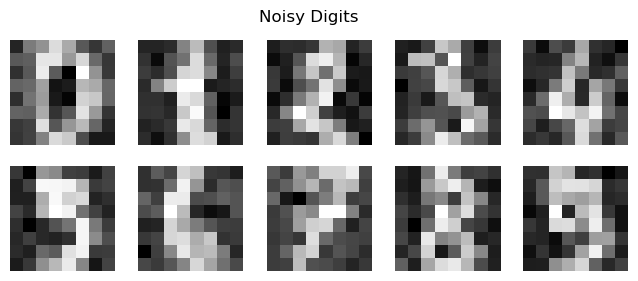

In [54]:
def plot_digits(data, title):
    fig, axes = plt.subplots(2, 5, figsize=(8, 3))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

plot_digits(X, "Original Digits")
plot_digits(noisy_digits, "Noisy Digits")

applying PCA to the noisy data

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data before PCA
scaler = StandardScaler()
X_noisy_scaled = scaler.fit_transform(noisy_digits)

# Applying PCA, say with 32 components (half of original 64)
pca = PCA(n_components=54)
X_pca = pca.fit_transform(X_noisy_scaled)

Transform the reduced data back to the original space using the inverse transform

In [56]:
X_reconstructed_scaled = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

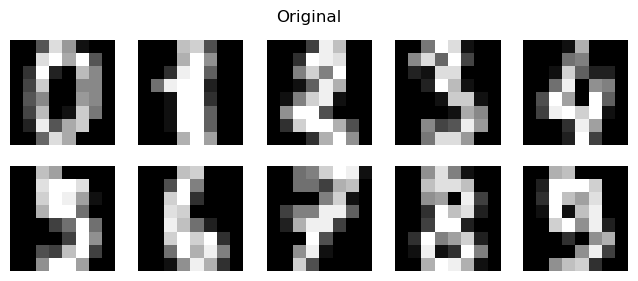

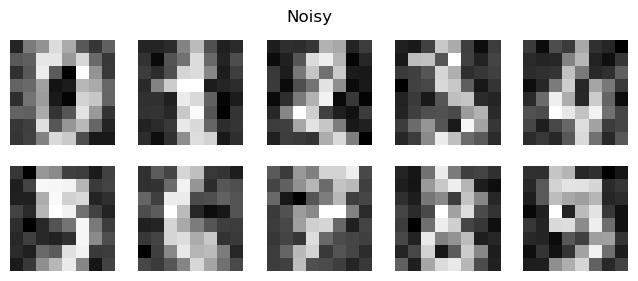

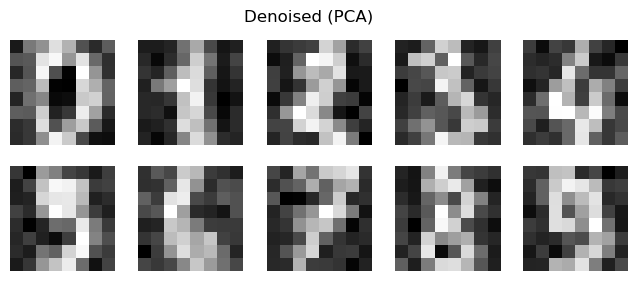

In [57]:
plot_digits(X, "Original")
plot_digits(noisy_digits, "Noisy")
plot_digits(X_reconstructed, "Denoised (PCA)")

In [58]:
from sklearn.metrics import mean_squared_error

mse_noisy = mean_squared_error(X, noisy_digits)
mse_recon = mean_squared_error(X, X_reconstructed)

print(f"MSE (Noisy vs Original): {mse_noisy:.2f}")
print(f"MSE (Reconstructed vs Original): {mse_recon:.2f}")

MSE (Noisy vs Original): 4.01
MSE (Reconstructed vs Original): 3.98
